In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
from xrayto3d_preprocess import scatterplot_1d, horizontal_line


In [12]:
stats_path = 'hip_stats.csv'
df = pd.read_csv(stats_path)
unusable_list = pd.read_csv('totalsegmentor_hip_unusable.list',header=None).to_numpy().flatten()

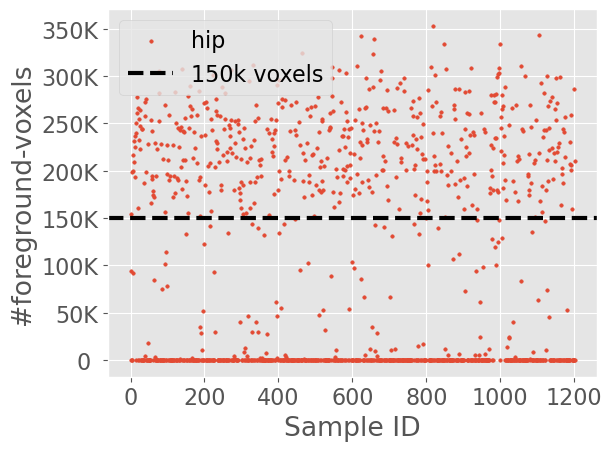

In [6]:
fig,ax = scatterplot_1d(df['total_voxels'].tolist(),label='hip')
horizontal_line(150000,label='150k voxels',color='k',fig=fig,ax=ax)
plt.ylabel('#foreground-voxels')
plt.xlabel('Sample ID')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('totalsegmentator_hip_voxel_plot.pdf')

In [16]:
df_non_empty = df[df['total_voxels'] != 0]
print('Scans containing Hip foreground',df_non_empty['total_voxels'].count())

voxel_threshold = 150000
df_threshold = df_non_empty[(df_non_empty['total_voxels'] > voxel_threshold)]
print(f'scans containing substantial Hip foreground',df_threshold['total_voxels'].count())

potential_subjects = df_threshold['Unnamed: 0'].to_numpy()
# removing subjects that were visually verified to contain only partial hips
filtered_subjects = [i for i in potential_subjects if i not in unusable_list]
print(f'scans after visual rejection',len(filtered_subjects))

#save to file
with open('totalsegmentor_hip_subjects.csv','w') as f:
    [f.write(f'{p}\n') for p in filtered_subjects]


Scans containing Hip foreground 632
scans containing substantial Hip foreground 509
scans after visual rejection 445


In [23]:
subjects_list = pd.read_csv('totalsegmentor_hip_subjects.csv')
sizes = []
for subject in subjects_list.to_numpy().flatten():
    hip_path = f'/mnt/SSD0/mahesh-home/xrayto3D-benchmark/2D-3D-Reconstruction-Datasets/totalsegmentator/Totalsegmentator_dataset/{subject}/hip_no_sacrum.nii.gz'
    
    img = sitk.ReadImage(hip_path)
    seg_stats = sitk.LabelShapeStatisticsImageFilter()
    seg_stats.Execute(img)
    bbox = seg_stats.GetBoundingBox(1)
    sizes.append(list(bbox[3:]))
    del img
print(f'Largest Region without sacrum',np.asarray(sizes).max(axis=0))

Largest Region without sacrum [282 128 394]


In [24]:
subjects_list = pd.read_csv('totalsegmentor_hip_subjects.csv')
sizes = []
for subject in subjects_list.to_numpy().flatten():
    hip_path = f'/mnt/SSD0/mahesh-home/xrayto3D-benchmark/2D-3D-Reconstruction-Datasets/totalsegmentator/Totalsegmentator_dataset/{subject}/hip_sacrum.nii.gz'
    
    img = sitk.ReadImage(hip_path)
    seg_stats = sitk.LabelShapeStatisticsImageFilter()
    seg_stats.Execute(img)
    bbox = seg_stats.GetBoundingBox(1)
    sizes.append(list(bbox[3:]))
    del img
print(f'Largest Region with sacrum',np.asarray(sizes).max(axis=0))

Largest Region with sacrum [282 132 394]


## 228 voxel width will cover most hip

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

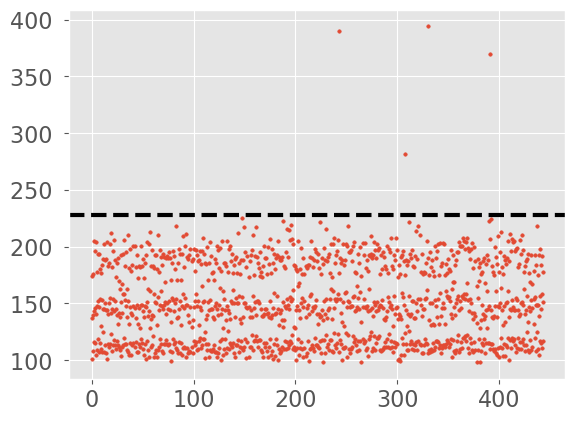

In [29]:
fig,ax = scatterplot_1d(np.array(sizes)[:,0].tolist(),'')
scatterplot_1d(np.array(sizes)[:,1].tolist(),'',fig=fig,ax=ax)
scatterplot_1d(np.array(sizes)[:,2].tolist(),'',fig=fig,ax=ax)
horizontal_line(228,color='k',label='t',fig=fig,ax=ax)